In [ ]:
%pip install pandas
%pip install numpy 
%pip install matplotlib
%pip install seaborn


In [2]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Carregar cada CSV limpo
df_netflix = pd.read_csv('C:/Users/nise_/OneDrive/Documentos/Digital College/Python/DA_18/streaming/Dados_tratados/data_netflix_clean.csv')
df_hbo = pd.read_csv('C:/Users/nise_/OneDrive/Documentos/Digital College/Python/DA_18/streaming/Dados_tratados/data_hbo_clean.csv')
df_apple = pd.read_csv('C:/Users/nise_/OneDrive/Documentos/Digital College/Python/DA_18/streaming/Dados_tratados/df_apple_clean.csv')
df_prime = pd.read_csv('C:/Users/nise_/OneDrive/Documentos/Digital College/Python/DA_18/streaming/Dados_tratados/data_prime_video_clean.csv')


print("📂 DATASETS CARREGADOS:")
print(f"Netflix: {len(df_netflix):,} registros")
print(f"HBO Max: {len(df_hbo):,} registros") 
print(f"Apple TV: {len(df_apple):,} registros")
print(f"Prime Video: {len(df_prime):,} registros")

📂 DATASETS CARREGADOS:
Netflix: 21,391 registros
HBO Max: 9,776 registros
Apple TV: 18,692 registros
Prime Video: 72,943 registros


In [ ]:
# Adicionar coluna de plataforma
df_netflix['platform'] = 'Netflix'
df_hbo['platform'] = 'HBO Max'
df_apple['platform'] = 'Apple TV+'
df_prime['platform'] = 'Prime Video'

In [ ]:

# ==========================================
# UNINDO OS DATASETS
# ==========================================

platforms = {
    'Netflix': df_netflix,
    'HBO Max': df_hbo, 
    'Apple TV': df_apple,
    'Prime Video': df_prime
}
# Concatenar todos os DataFrames em um único DataFrame
df_streaming = pd.concat([df_netflix, df_hbo, df_apple, df_prime], ignore_index=True)


print(f"\n🎬 DATASET UNIFICADO CRIADO:")
print(f"Total de registros: {len(df_streaming):,}")
print(f"Total de colunas: {len(df_streaming.columns)}")
print(f"Colunas: {list(df_streaming.columns)}")


In [6]:

# ==========================================
# VERIFICAÇÃO RÁPIDA
# ==========================================

print(f"\n📊 DISTRIBUIÇÃO POR PLATAFORMA:")
platform_counts = df_streaming['platform'].value_counts()
for platform, count in platform_counts.items():
    percentage = (count / len(df_streaming)) * 100
    print(f"  {platform}: {count:,} ({percentage:.1f}%)")


📊 DISTRIBUIÇÃO POR PLATAFORMA:
  Prime Video: 72,943 (59.4%)
  Netflix: 21,391 (17.4%)
  Apple TV+: 18,692 (15.2%)
  HBO Max: 9,776 (8.0%)


In [7]:
# ==========================================
# VISUALIZAÇÃO: DRAMA vs TERROR POR PLATAFORMA
# ==========================================

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Configurar estilo
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 11


In [8]:

# ==========================================
# ANÁLISE DE GÊNEROS ESPECÍFICOS
# ==========================================

def count_genre_by_platform(df, genre_name):
    """Conta quantos títulos de um gênero específico cada plataforma tem"""
    
    # Filtrar títulos que contêm o gênero (case insensitive)
    genre_mask = df['genres'].str.contains(genre_name, case=False, na=False)
    genre_df = df[genre_mask]
    
    # Contar por plataforma
    counts = genre_df['platform'].value_counts()
    
    return counts

# Contar Drama e Terror
drama_counts = count_genre_by_platform(df_streaming, 'Drama')
horror_counts = count_genre_by_platform(df_streaming, 'Horror')

print("🎭 CONTAGEM DE DRAMA POR PLATAFORMA:")
for platform, count in drama_counts.items():
    print(f"  {platform}: {count:,} títulos")

print("\n👻 CONTAGEM DE TERROR POR PLATAFORMA:")
for platform, count in horror_counts.items():
    print(f"  {platform}: {count:,} títulos")



🎭 CONTAGEM DE DRAMA POR PLATAFORMA:
  Prime Video: 30,581 títulos
  Netflix: 9,967 títulos
  Apple TV+: 8,485 títulos
  HBO Max: 3,527 títulos

👻 CONTAGEM DE TERROR POR PLATAFORMA:
  Prime Video: 8,254 títulos
  Apple TV+: 1,792 títulos
  Netflix: 1,300 títulos
  HBO Max: 460 títulos


In [ ]:
# ================
# CRIAR DATAFRAME 
# ================

# Garantir que todas as plataformas apareçam (mesmo com 0)
all_platforms = df_streaming['platform'].unique()

drama_data = []
horror_data = []

for platform in all_platforms:
    drama_count = drama_counts.get(platform, 0)
    horror_count = horror_counts.get(platform, 0)
    
    drama_data.append({'Platform': platform, 'Genre': 'Drama', 'Count': drama_count})
    horror_data.append({'Platform': platform, 'Genre': 'Horror', 'Count': horror_count})

# Combinar dados
viz_data = pd.DataFrame(drama_data + horror_data)



🔍 DEBUG - Totais por plataforma:
  Prime Video: 72,943 títulos
  Netflix: 21,391 títulos
  Apple TV+: 18,692 títulos
  HBO Max: 9,776 títulos

🔍 DEBUG - Dados de proporção:
    Platform   Genre  Percentage
0    Netflix   Drama   46.594362
1    Netflix  Horror    6.077322
2    HBO Max   Drama   36.078151
3    HBO Max  Horror    4.705401
4  Apple TV+   Drama   45.393751


C:\Users\nise_\AppData\Local\Temp\ipykernel_89936\3110626229.py:62: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\nise_\AppData\Local\Temp\ipykernel_89936\3110626229.py:62: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\nise_\OneDrive\Documentos\Digital College\Python\DA_18\streaming\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\nise_\OneDrive\Documentos\Digital College\Python\DA_18\streaming\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


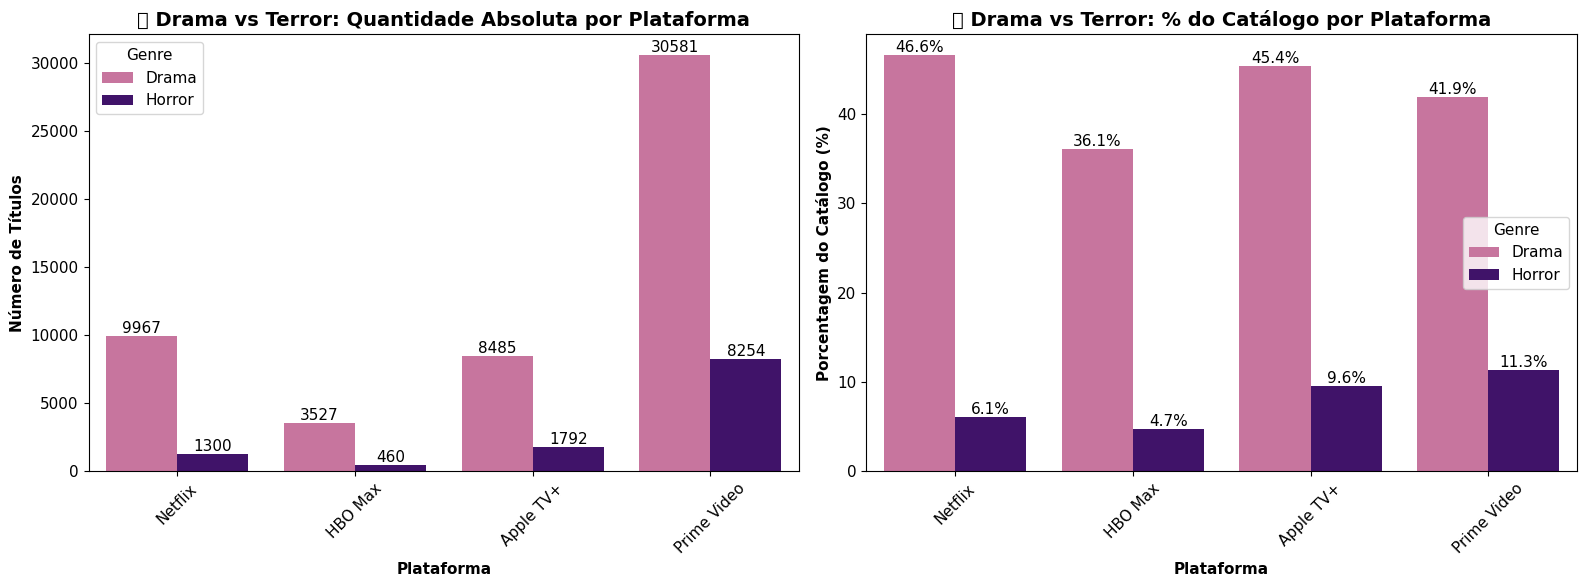

In [10]:

# ==========================================
# VISUALIZAÇÃO 1: GRÁFICO DE BARRAS AGRUPADO
# ==========================================

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Barras agrupadas
sns.barplot(data=viz_data, x='Platform', y='Count', hue='Genre', palette=["#D5679E", "#400577"], ax=ax1)
ax1.set_title('📊 Drama vs Terror: Quantidade Absoluta por Plataforma', fontsize=14, fontweight='bold')
ax1.set_xlabel('Plataforma', fontweight='bold')
ax1.set_ylabel('Número de Títulos', fontweight='bold')
ax1.tick_params(axis='x', rotation=45)

# Adicionar valores nas barras
for container in ax1.containers:
    ax1.bar_label(container, fmt='%d')

# ==========================================
# VISUALIZAÇÃO 2: PROPORÇÃO RELATIVA
# ==========================================

# Calcular proporções relativas ao catálogo total de cada plataforma
platform_totals = df_streaming['platform'].value_counts()

# Debug: vamos ver os totais
print(f"\n🔍 DEBUG - Totais por plataforma:")
for platform, total in platform_totals.items():
    print(f"  {platform}: {total:,} títulos")

# Criar dados de proporção de forma mais robusta
prop_data_list = []

for platform in all_platforms:
    total = platform_totals[platform]
    drama_count = drama_counts.get(platform, 0)
    horror_count = horror_counts.get(platform, 0)
    
    drama_prop = (drama_count / total) * 100 if total > 0 else 0
    horror_prop = (horror_count / total) * 100 if total > 0 else 0
    
    prop_data_list.append({'Platform': platform, 'Genre': 'Drama', 'Percentage': drama_prop})
    prop_data_list.append({'Platform': platform, 'Genre': 'Horror', 'Percentage': horror_prop})

prop_data = pd.DataFrame(prop_data_list)

# Debug: verificar o DataFrame
print(f"\n🔍 DEBUG - Dados de proporção:")
print(prop_data.head())

# Gráfico 2: Proporções
sns.barplot(data=prop_data, x='Platform', y='Percentage', hue='Genre', palette=["#D5679E", "#400577"], ax=ax2)
ax2.set_title('📈 Drama vs Terror: % do Catálogo por Plataforma', fontsize=14, fontweight='bold')
ax2.set_xlabel('Plataforma', fontweight='bold')
ax2.set_ylabel('Porcentagem do Catálogo (%)', fontweight='bold')
ax2.tick_params(axis='x', rotation=45)

# Adicionar valores nas barras (com verificação)
for container in ax2.containers:
    if len(container) > 0:  # Verificar se container não está vazio
        ax2.bar_label(container, fmt='%.1f%%')

plt.tight_layout()
plt.show()

In [11]:

# ==========================================
# RANKING TEXTUAL
# ==========================================

print(f"\n🏆 RANKINGS:")
print("=" * 50)

print("🎭 DRAMA - Ranking por Quantidade:")
for i, (platform, count) in enumerate(drama_counts.items(), 1):
    print(f"  {i}º {platform}: {count:,} títulos")

print("\n👻 TERROR - Ranking por Quantidade:")
for i, (platform, count) in enumerate(horror_counts.items(), 1):
    print(f"  {i}º {platform}: {count:,} títulos")

# Ranking por proporção
drama_prop_ranking = prop_data[prop_data['Genre'] == 'Drama'].sort_values('Percentage', ascending=False)
horror_prop_ranking = prop_data[prop_data['Genre'] == 'Horror'].sort_values('Percentage', ascending=False)

print("\n🎭 DRAMA - Ranking por % do Catálogo:")
for i, row in enumerate(drama_prop_ranking.itertuples(), 1):
    print(f"  {i}º {row.Platform}: {row.Percentage:.1f}% do catálogo")

print("\n👻 TERROR - Ranking por % do Catálogo:")
for i, row in enumerate(horror_prop_ranking.itertuples(), 1):
    print(f"  {i}º {row.Platform}: {row.Percentage:.1f}% do catálogo")


🏆 RANKINGS:
🎭 DRAMA - Ranking por Quantidade:
  1º Prime Video: 30,581 títulos
  2º Netflix: 9,967 títulos
  3º Apple TV+: 8,485 títulos
  4º HBO Max: 3,527 títulos

👻 TERROR - Ranking por Quantidade:
  1º Prime Video: 8,254 títulos
  2º Apple TV+: 1,792 títulos
  3º Netflix: 1,300 títulos
  4º HBO Max: 460 títulos

🎭 DRAMA - Ranking por % do Catálogo:
  1º Netflix: 46.6% do catálogo
  2º Apple TV+: 45.4% do catálogo
  3º Prime Video: 41.9% do catálogo
  4º HBO Max: 36.1% do catálogo

👻 TERROR - Ranking por % do Catálogo:
  1º Prime Video: 11.3% do catálogo
  2º Apple TV+: 9.6% do catálogo
  3º Netflix: 6.1% do catálogo
  4º HBO Max: 4.7% do catálogo


In [12]:
# Análise dos filmes mais bem avaliados (top 100)
top_rated = df_streaming.sort_values(by='imdbAverageRating', ascending=False).head(100)
top_rated_counts = top_rated['platform'].value_counts()

print("Distribuição dos Top 100 filmes mais bem avaliados por plataforma:")
print(top_rated_counts)

Distribuição dos Top 100 filmes mais bem avaliados por plataforma:
platform
Prime Video    81
Netflix         7
HBO Max         7
Apple TV+       5
Name: count, dtype: int64


In [13]:
# Estatísticas gerais por plataforma
platform_stats = df_streaming.groupby('platform')['imdbAverageRating'].agg([
    'mean', 'median', 'std', 'count'
]).round(2)

print("\nEstatísticas gerais por plataforma:")
print(platform_stats)

# Percentual de filmes com nota alta (acima de 7.0)
high_rated = df_streaming[df_streaming['imdbAverageRating'] >= 7.0]
high_rated_percentage = high_rated.groupby('platform').size() / df_streaming.groupby('platform').size() * 100

print("\nPercentual de filmes com nota ≥ 7.0:")
print(high_rated_percentage.round(2))

# Top 10 filmes mais bem avaliados de cada plataforma
print("\nTop 3 filmes por plataforma:")
for platform in df_streaming['platform'].unique():
    platform_data = df_streaming[df_streaming['platform'] == platform]
    top_3 = platform_data.nlargest(3, 'imdbAverageRating')
    print(f"\n{platform}:")
    print(top_3[['title', 'imdbAverageRating']].to_string(index=False))



Estatísticas gerais por plataforma:
             mean  median   std  count
platform                              
Apple TV+    6.41     6.5  1.14  18692
HBO Max      6.70     6.8  1.01   9776
Netflix      6.43     6.5  1.09  21391
Prime Video  6.00     6.1  1.33  72943

Percentual de filmes com nota ≥ 7.0:
platform
Apple TV+      34.39
HBO Max        41.78
Netflix        33.26
Prime Video    25.33
dtype: float64

Top 3 filmes por plataforma:

Netflix:
            title  imdbAverageRating
Mysterious murder                9.8
     Breaking Bad                9.5
          Ayaanle                9.4

HBO Max:
                                   title  imdbAverageRating
                    Operação Transplante                9.8
Master Distiller Tournament of Champions                9.6
                            Planet Earth                9.4

Apple TV+:
                   title  imdbAverageRating
                 Foxhole               10.0
            Dance for Me                9.7
B

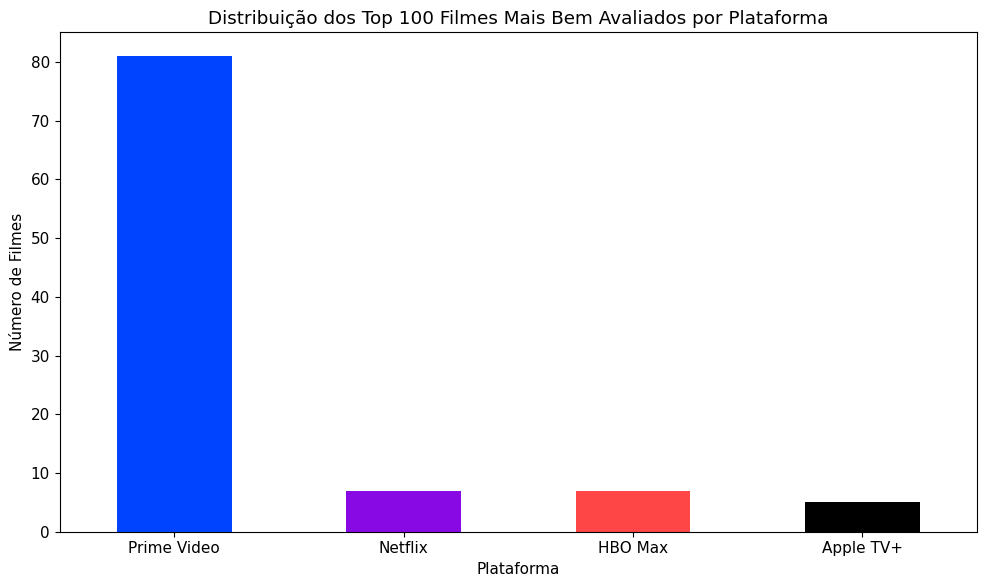

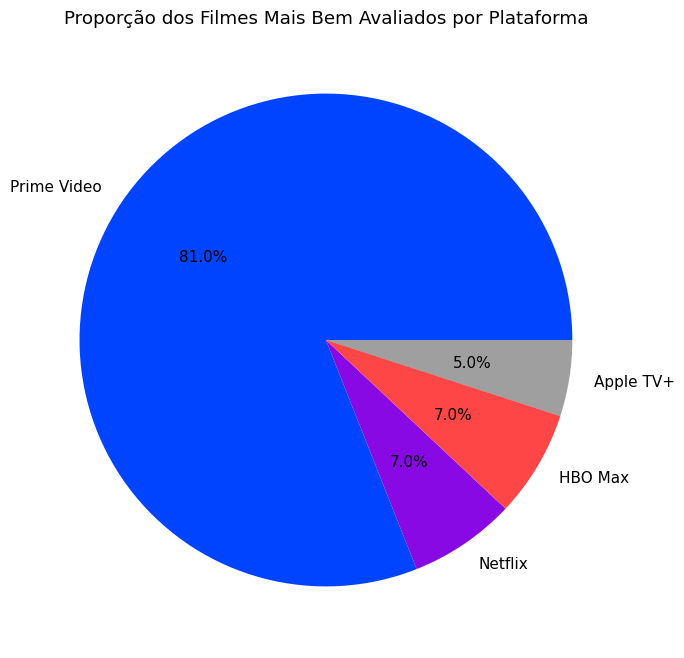

In [14]:
# Gráfico de barras da distribuição
plt.figure(figsize=(10, 6))
top_rated_counts.plot(kind='bar', color=["#0044FF", "#8909E5", "#FF4646", '#000000'])
plt.title('Distribuição dos Top 100 Filmes Mais Bem Avaliados por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Número de Filmes')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(top_rated_counts.values, 
         labels=top_rated_counts.index, 
         autopct='%1.1f%%',
         colors=["#0044FF", "#8909E5", "#FF4646", "#00000060"])
plt.title('Proporção dos Filmes Mais Bem Avaliados por Plataforma')
plt.show()

In [15]:
# Ranking das plataformas por média de avaliação (IMDB)
ranking_average_ratings = (
    df_streaming.groupby('platform')['imdbAverageRating']
    .mean()
    .sort_values(ascending=False)
    .round(2)
)

print("🏆 Ranking das plataformas por média de avaliação (IMDB):")
for i, (platform, media) in enumerate(ranking_average_ratings.items(), 1):
    print(f"  {i}º {platform}: média {media}")

🏆 Ranking das plataformas por média de avaliação (IMDB):
  1º HBO Max: média 6.7
  2º Netflix: média 6.43
  3º Apple TV+: média 6.41
  4º Prime Video: média 6.0
